In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the RiverAtlas Shapefile
shapefile_path = 'data/GloRiC_v10_shapefile/reduced_GloRiC_v10.shp'

df = gpd.read_file(shapefile_path)
df.head()

,Reach_ID,Next_down,Length_km,Log_Q_avg,Log_Q_var,Class_hydr,Temp_min,CMI_indx,Log_elev,Class_phys,Lake_wet,Stream_pow,Class_geom,Reach_type,Kmeans_30,geometry
0,10004164,10004139,0.971,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,"LINESTRING (5.29375 35.99792, 5.28958 36.00208..."
1,10004361,10004164,4.105,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,"LINESTRING (5.30625 35.96458, 5.30208 35.96875..."
2,10004434,10004361,2.648,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,"LINESTRING (5.32292 35.95208, 5.32292 35.96042..."
3,10004553,0,2.318,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,"LINESTRING (5.78125 35.92292, 5.78958 35.93125..."
4,10004670,10004553,7.484,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,"LINESTRING (5.71042 35.90208, 5.71458 35.90625..."


In [7]:
df['gradient'] = df['Stream_pow'] /(10 ** df['Log_Q_avg'] * 1000 * 9.81)

In [10]:
df.gradient.max()

0.10093552295902475

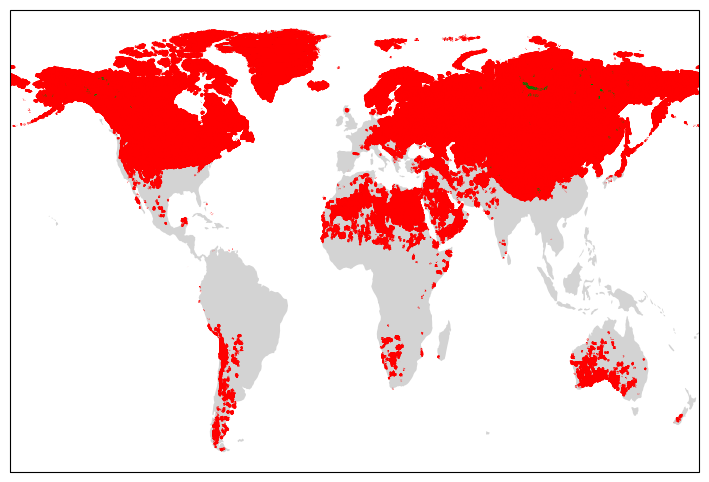

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and ocean background
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot the RiverAtlas data
df.plot(color='red',ax=ax)

# Plot the RiverAtlas data
df[df.Stream_pow>1000].plot(color='green',ax=ax)

# Display the plot
plt.show()

In [3]:
df.Stream_pow.max()

14049.8

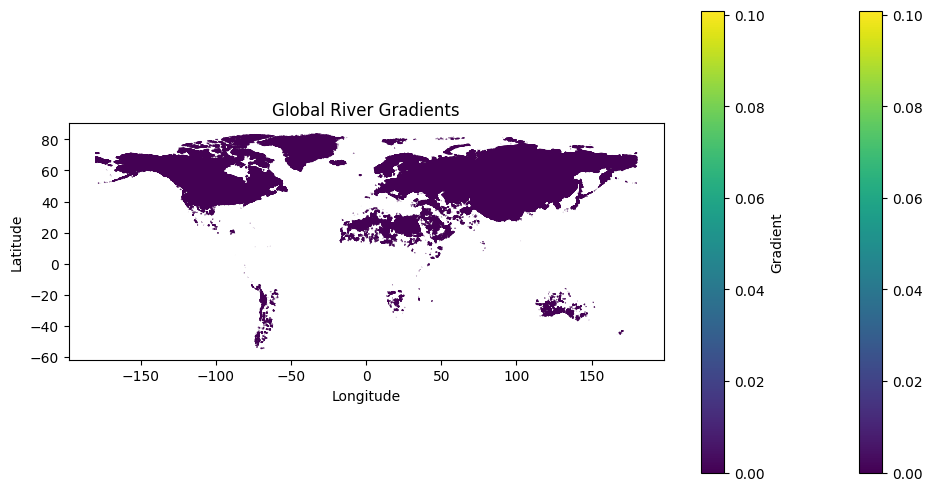

In [11]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the river lines with different colors based on gradient
df.plot(column='gradient', cmap='viridis', linewidth=0.8, ax=ax, legend=True)

# Set the title and labels
ax.set_title('Global River Gradients')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar
cbar = plt.colorbar(ax.get_children()[0], ax=ax)
cbar.set_label('Gradient')

# Show the plot
plt.show()